**GALAXY FORMATION**

In [1]:
import math
import numpy as np
import scipy.stats
from scipy import special
import pylab as plt
#import SDDlib as sdd
%matplotlib notebook
#import tqdm
plt.rcParams['figure.figsize'] = [8, 8]

*Assumptions*: 

spherical homogeneus dark matter halo 

only hydrogen (we will relax this condition later)

the halo is virialized: rho = 200 rho_0

thermal equilibrium: particles follow Maxwell-Boltzmann distribution and the internal energy is (3/2)Nk_bT

normal matter is in hydrostatic equilibrium: virial theorem holds

ionization equilibrium: in particular, we will assume collisional ionization equilibrium (no UV background if galaxies haven't formed yet)

*Goal:*

The halo collapses under it's own gravity if the cooling time is shorter than the free fall time (efficient cooling). In which range of temperatures or masses happens? Does this depend on redshift?  

In [2]:
#usefull constants
G = 6.67*10**(-8) #g^-1 cm^3 s^-2
m_p = 1.67262192 * 10**(-24) #g
kb = 1.38 * 10**(-16) #erg/K
E_ion_hydrogen = 13.6 * 1.60218e-12
E_Ly_alpha = 10.2 * 1.60218e-12
E_Ly_beta = 12.1 * 1.60218e-12
n_0 = 2*10**(-7) #cm^-3
delta = 200 #overdensity
f_baryon = 0.15 #fraction of baryonic matter over total matter
mu = 1 #only hydrogen
solar_mass = 1.989*10**(33)

In [3]:
#indipendent variables
T = np.linspace (10**3, 10**8, 100000)
z = np.linspace (0, 6, 7)
n = n_0*delta*(1+z)**3 #hydrogen (proton) number density 
rho = n*m_p*mu/f_baryon

In order to get the cooling time we need the cooling function. There are three processes that allow a gas to cool down: recombination, collisional excitation and bremsstrahlung. All of this emit radiation, which will carry energy off the system beeing the gas OPTICALLY THIN.

Recombination subtracts some of the kinetic energy of the particles and emits a photon. It depends on the number density of IONS and FREE ELECTRONS, and on a coefficient alpha function of temperature.

Collisional excitation occurs when an electron hits a neutral hydrogen atom and has enough energy to excite the system from ground state to first state (Ly alpha), or to second state (Ly beta). It will loose some of its kinetic energy, and the excited atom will emit a photon. We will neglect transitions successive to Ly beta. It depends on the number density of NEUTRAL HYDROGEN and FREE ELECTRONS. 

Ionization is not accounted as a cooling process, because it doesn't produce radiation. Still it's important, because it determines the neutral and ionized fractions. We will assume ionization equilibrium. Moreover we will see that the gas is in collisional ionization equilibrium (CIE). 

Bremsstrahlung is also called free-free radiation. It depends on the number density of IONS and FREE ELECTRONS, and goes as the square of temperature. 

The recombination coefficient alpha decreases with temperature approximately as T^-1. The collisional ionization coefficient drops esponentially to zero below the hydrogen ionization threshold of 13.6 eV, which correspond to a temperature of 13.6/k_b = 1.58e5 K. The exponential shape comes from Maxwell-Boltzmann distribution. 

We can compute beta coefficients also for collisional excitation, plugging the transition energies instead of the ionization energy.

Should we consider the collisional excitations related to the Balmer series? To see this transition the population of hydrogen in n=2 state must be consistent. In order to have this process the ionized fraction must be non zero, thus temperature, as we will see, must be at least 10^4 K. At this temperature the fraction of n=2 over n=1 hydrogen is given by Boltzmann distribution and it's very little:

In [4]:
print(np.exp((E_Ly_alpha-E_ion_hydrogen)/(kb*10**4)))

0.019304829137334993


We compute alpha and beta coefficients.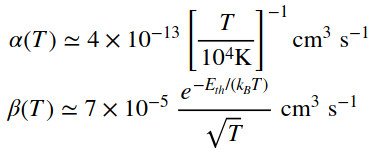

<IPython.core.display.Javascript object>


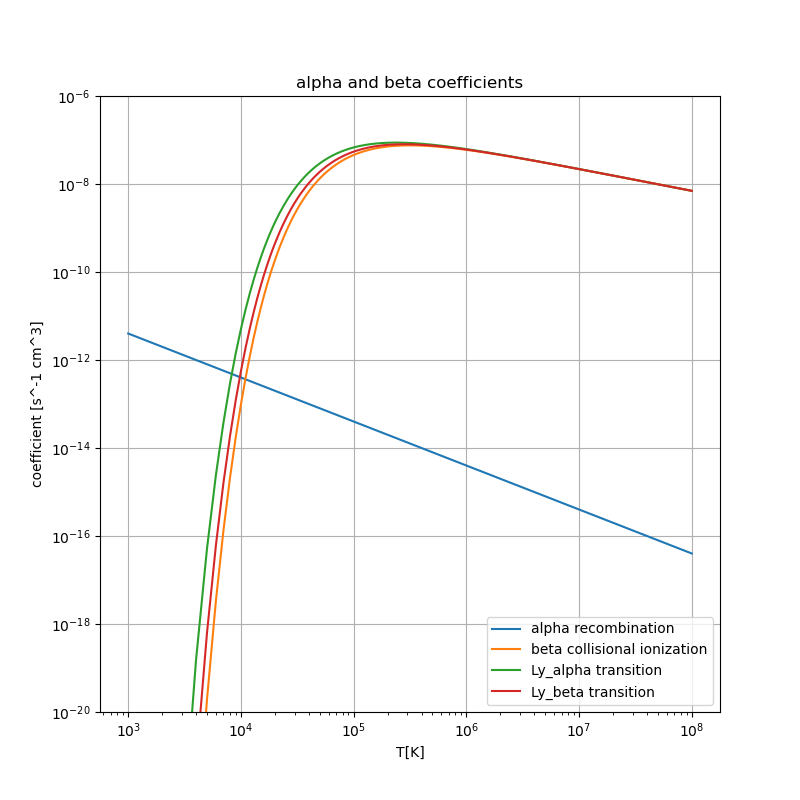

In [5]:
alpha = 4 * 10 **(-13) * (T/10**4) **(-1)
beta = 7 * 10** (-5) * np.exp(-E_ion_hydrogen/(kb * T)) * T**(-0.5)
beta_Ly_alpha = 7 * 10** (-5) * np.exp(-E_Ly_alpha/(kb * T)) * T**(-0.5)
beta_Ly_beta = 7 * 10** (-5) * np.exp(-E_Ly_beta/(kb * T)) * T**(-0.5)

plt.plot(T, alpha, label="alpha recombination")
plt.plot(T, beta, label = "beta collisional ionization")
plt.plot(T, beta_Ly_alpha, label = "Ly_alpha transition")
plt.plot(T, beta_Ly_beta, label = "Ly_beta transition")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("T[K]")
plt.ylabel("coefficient [s^-1 cm^3]")
plt.ylim((10**-20, 10**-6))
plt.title("alpha and beta coefficients")
plt.legend()
plt.grid()
plt.show()

We will assume the gas is in collisional ionization equilibrium. Still, it could be interesting to allow a non zero gamma coefficient to see what happens. We know the COSMIC UV BACKGROUND: we assume this photons are produced by star forming galaxies, or by quasars. 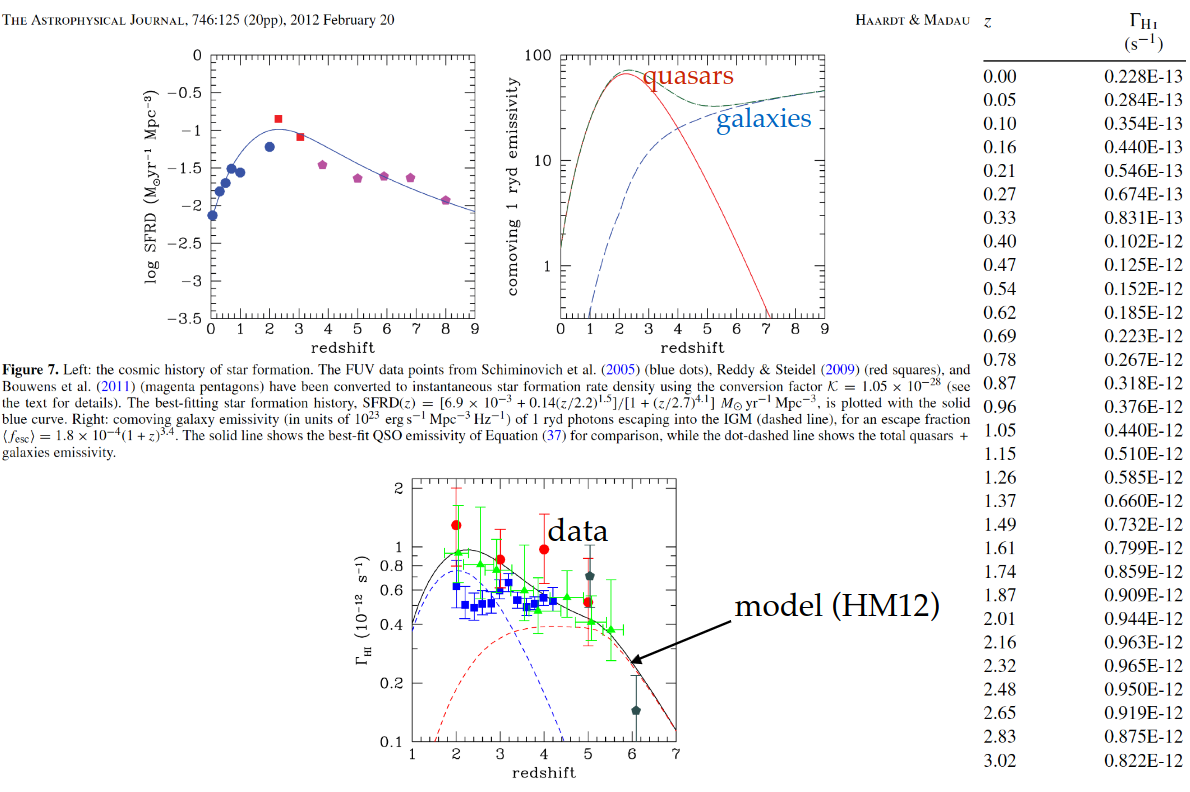



<IPython.core.display.Javascript object>


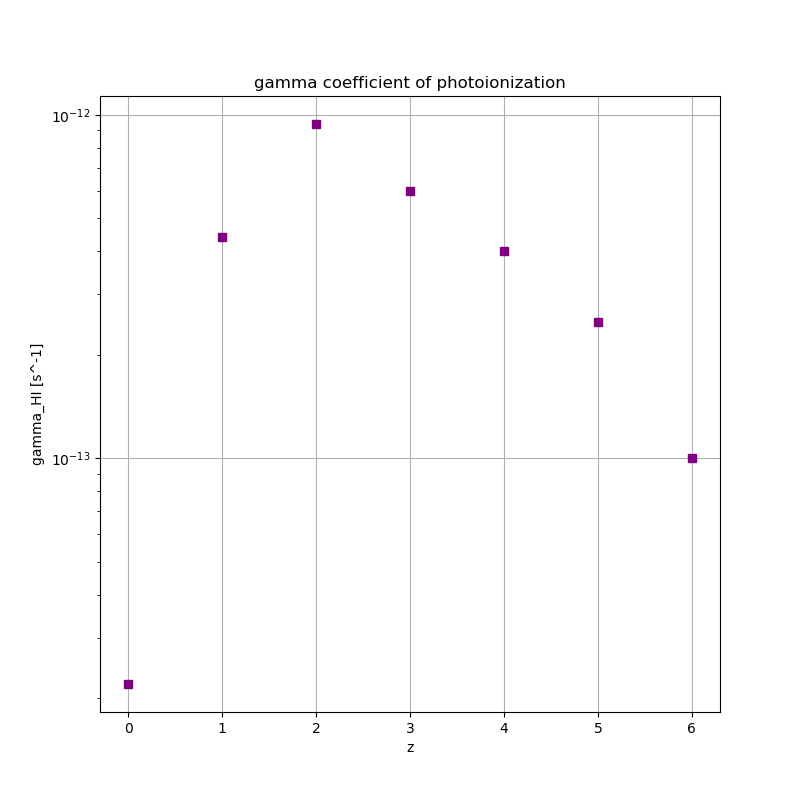

In [6]:
gamma = 10**(-12)*np.array([0.022,0.44,0.94,0.6,0.4,0.25,0.1])



plt.plot(z, gamma, 's', color="purple")
plt.yscale("log")

plt.xlabel("z")
plt.ylabel("gamma_HI [s^-1]")
plt.title("gamma coefficient of photoionization")
plt.show()
plt.grid()

STILL, ISN'T CONTRADICTORY TO CONSIDER THIS UV BACKGROUND WHEN INVESTIGATING OVER GALAXY FORMATION? GALAXIES ARE NOT FORMED YET. 

In [7]:
#gamma = np.array([0,0,0,0,0,0,0])

def xII(z):
    return (n[z]*beta - gamma[z] + np.sqrt((gamma[z]-n[z]*beta)**2 + 4*(alpha+beta)*n[z]*gamma[z]))/(2*(alpha+beta)*n[z])

def xI(z):
    return 1-xII(z)

#if n_HI * gamma is very little the dependency from z is only in n and it's trivial

<IPython.core.display.Javascript object>


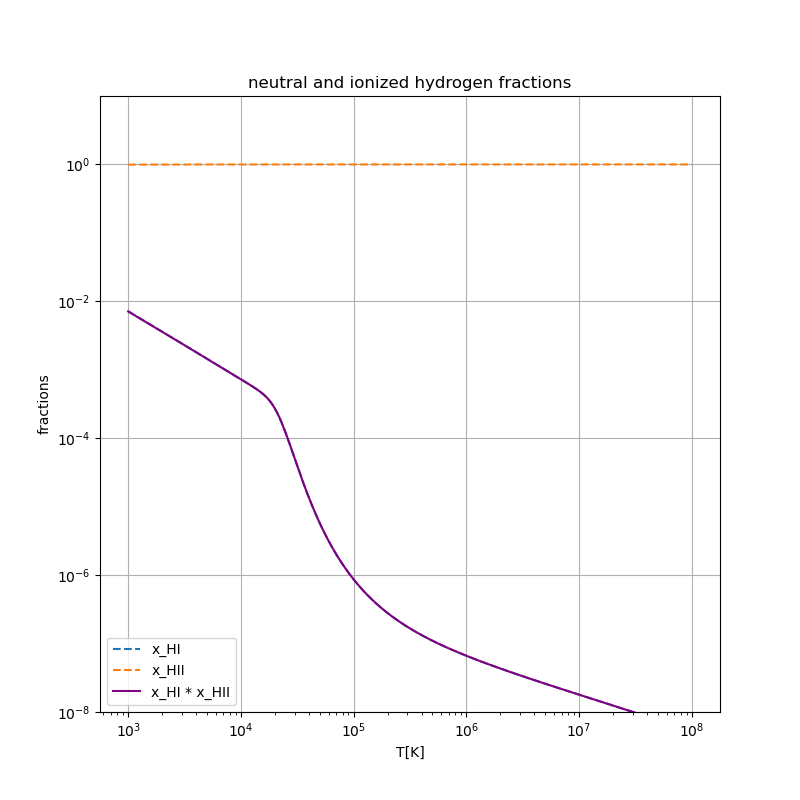

(1e-08, 10)

In [8]:
plt.plot(T, xI(0), label = "x_HI", linestyle = "--")
plt.plot(T, xII(0), label = "x_HII", linestyle = "--")
plt.plot(T, xI(0) * xII(0), label = "x_HI * x_HII", color = "purple")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("T[K]")
plt.ylabel("fractions")
plt.title("neutral and ionized hydrogen fractions")
plt.legend()
plt.grid()
plt.show()
plt.ylim((10**-8, 10))

Now we are ready to look for the total cooling function. The cooling function units are those of an emissivity: erg s^-1 cm^-3. It's usefull to normalize it by the number density squared. The reason will be clear later. 

In [9]:
#cooling emissivities and total cooling function, NORMALIZED BY THE NUMBER DENSITY SQUARED

def e_br(z):
    g_B = 0.5 #Gaunt factor
    return (1.4*10**(-27)* n[z]**2 * xII(z)**2 * T ** (1/2) * g_B)/n[z]**2
    
def e_collision_Ly_alpha(z):
    return (n[z]**2 * xI(z) * xII(z) * beta_Ly_alpha * E_Ly_alpha)/n[z]**2

def e_collision_Ly_beta(z):
    return (n[z]**2 * xI(z) * xII(z) * beta_Ly_beta * E_Ly_beta)/n[z]**2

def e_recombination(z):
    return  (n[z]**2 * xII(z)**2 * alpha * (3/2)*kb*T)/n[z]**2

#the dependency on z is actually killed, unless some non zero gamma coefficient affects xII.

alpha = 4 * 10 **(-13) * (T/10**4) **(-1)
beta = 7 * 10** (-5) * np.exp(-E_ion_hydrogen/(kb * T)) * T**(-0.5)
beta_Ly_alpha = 7 * 10** (-5) * np.exp(-E_Ly_alpha/(kb * T)) * T**(-0.5)

We can also account for helium. 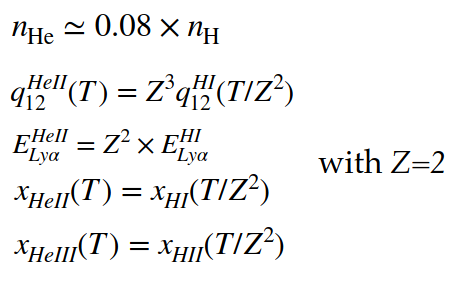

In [10]:
Z_He = 2
E_Ly_He = Z_He**2 * E_Ly_alpha #a che serve??
n_He = 0.08 * n

#was more clever to define the coefficients as functions of atomic number Z.
q_12_He = Z_He**3 * 7 * 10** (-5) * np.exp(-E_Ly_alpha/(kb * (T/Z_He**2))) * (T/Z_He**2)**(-0.5)
alpha_He = 4 * 10 **(-13) * ((T/Z_He**2)/10**4) **(-1)
betha_ion_He = 7 * 10**(-5) * np.exp(-E_ion_hydrogen/(kb * (T/Z_He**2)))  * (T/Z_He**2)**(-0.5)
X_HeII = alpha_He / (alpha_He + betha_ion_He)
X_HeIII = betha_ion_He / (alpha_He + betha_ion_He)

def e_collision_Ly_He(z):
    return n_He[z]**2 * X_HeII * X_HeIII * q_12_He * (E_Ly_He) / n[z]**2

In [11]:
def cooling_function(z):
    return e_br(z) + e_collision_Ly_alpha(z) + e_collision_Ly_beta(z) + e_recombination(z) + e_collision_Ly_He(z)

<IPython.core.display.Javascript object>


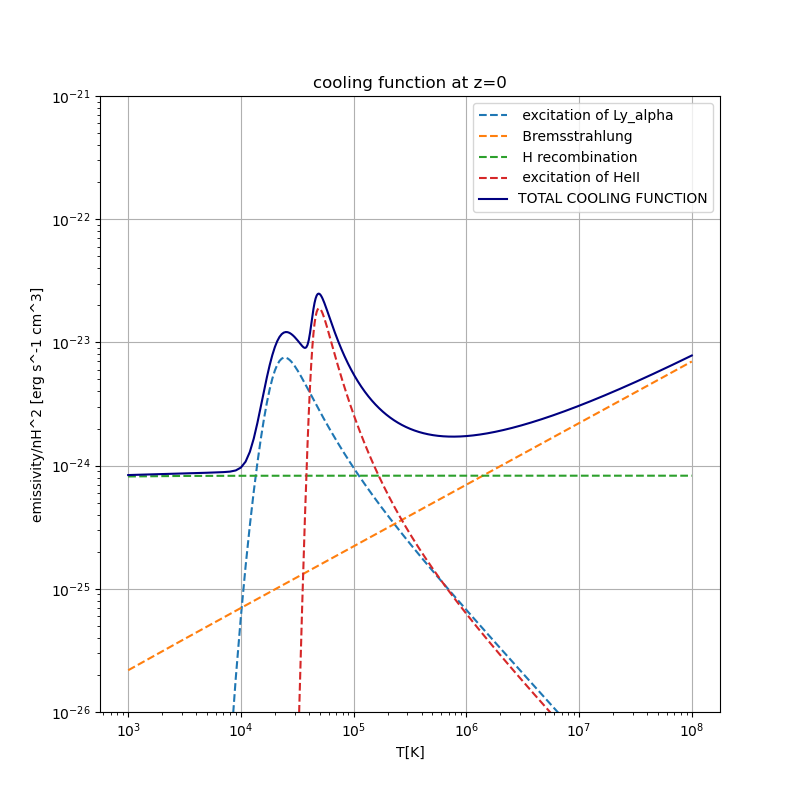

In [12]:
plt.plot(T, e_collision_Ly_alpha(0), label = " excitation of Ly_alpha", linestyle ='--')
plt.plot(T, e_br(0), label = " Bremsstrahlung", linestyle ='--')
plt.plot(T, e_recombination(0), label = " H recombination", linestyle ='--')
plt.plot(T, e_collision_Ly_He(0), label = " excitation of HeII", linestyle ='--')
plt.plot(T, cooling_function(0), label = "TOTAL COOLING FUNCTION", color = "navy")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("T[K]")
plt.ylabel("emissivity/nH^2 [erg s^-1 cm^3]")
plt.title("cooling function at z=0")

plt.ylim((10**-26, 10**-21))
plt.grid()
plt.legend()

Now that we have the cooling function, we can proceed with the investigation. The cooling time is given by the internal energy over the cooling function times V (assumption optically thin medium). t_cool = U/lambda * V. It is a function of T.

The internal energy is (3/2) N k_b T, where N is the total number of ordinary matter particles in the halo. N/V = n

In [13]:
def t_cool(i): 
    return 3.17098*10**(-8)*(3/2)*kb*T/(cooling_function(i)*n[i]) #in years
def t_free_fall(i):
    return 3.17098*10**(-8)*np.sqrt(3*math.pi/(32*G*rho[i])) #in years

<IPython.core.display.Javascript object>


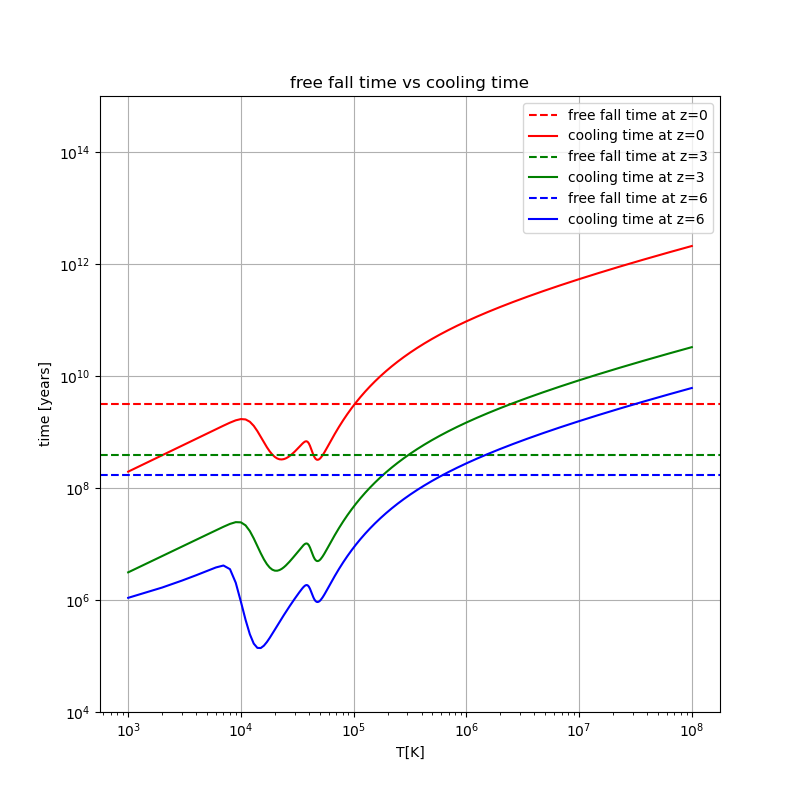

In [14]:
plt.axhline(t_free_fall(0), label="free fall time at z=0", color="red", linestyle ='--')
plt.plot(T, t_cool(0), label="cooling time at z=0", color="red")
plt.axhline(t_free_fall(3), label="free fall time at z=3", color="green", linestyle ='--')
plt.plot(T, t_cool(3), label="cooling time at z=3", color="green")
plt.axhline(t_free_fall(6), label="free fall time at z=6", color="blue", linestyle ='--')
plt.plot(T, t_cool(6), label="cooling time at z=6", color="blue")

plt.xscale("log")
plt.yscale("log")
plt.ylim((10**4, 10**15))
plt.legend()
plt.xlabel("T[K]")
plt.ylabel("time [years]")
plt.title("free fall time vs cooling time")

plt.grid()
plt.show()

Let's draw the curve t_cool=t_free_fall in a T-rho diagram. (normalization of the cooling function was needed to draw this curve)

sqrt(3pi/32 G rho)> 3/2 N kb T/(lambda n^2 V) is the condition for collapse

In [15]:
#locus in the T-n diagram of t_cool=t_free_fall
#if the cooling function doesn't depend on z, also this locus will not depend on z
def locus(z): 
    return 24*G*m_p*mu*kb**2/(math.pi*f_baryon) * T**2/cooling_function(z)**2 

Since the halo in in virialized and the virial theorem holds, we can compute the mass as a function of T and n

T = (G m_p mu / 3 f_baryon kb) M/R

R = (3M/4pi rho)^1/3

M_vir = (3/(4 math.pi))^(1/2) (3 f_baryon kb)/(G m_p mu))^(3/2) T^(3/2) rho^(-1/2)

We can solve for the number density n to find the curves of constant mass in the T-n diagram

rho = (n m_p mu / f) = (3 f k T/ m_p mu G)^3 (3/4pi) M^(-2)

In [16]:
def n_mass(m):
    return (3/4*math.pi)*(f_baryon/(m_p*mu))**4 * (3*kb*T/G)**3 * m**(-2)

<IPython.core.display.Javascript object>


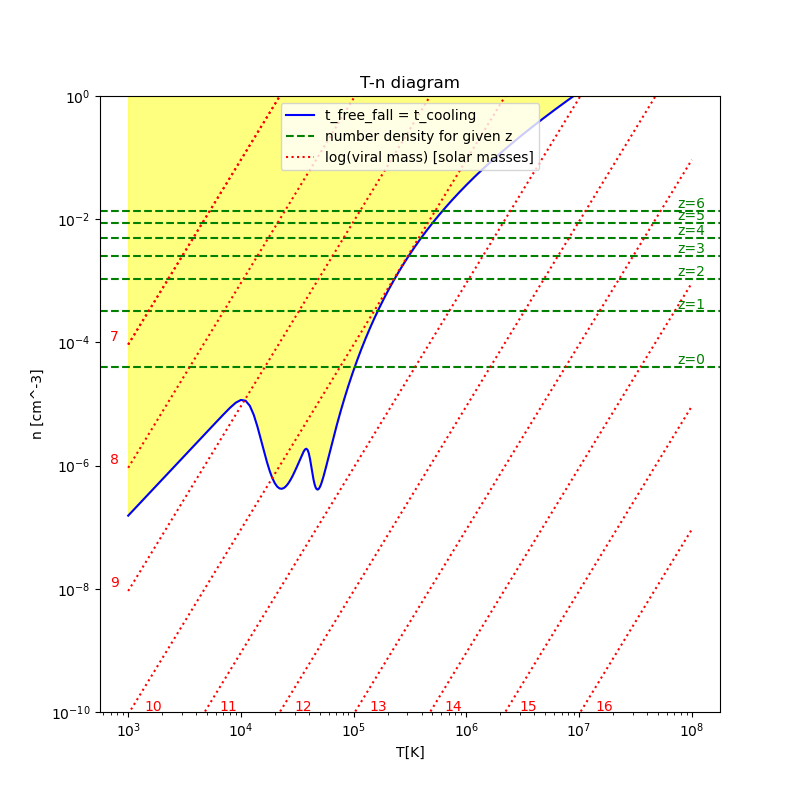

In [17]:
plt.plot(T, locus(0), label="t_free_fall = t_cooling", color="blue") 
plt.axhline(n[0], label="number density for given z", color="green", linestyle ='--')
plt.annotate("z=0", (10**8,n[0]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[1], color="green", linestyle ='--')
plt.annotate("z=1", (10**8,n[1]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[2], color="green", linestyle ='--')
plt.annotate("z=2", (10**8,n[2]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[3], color="green", linestyle ='--')
plt.annotate("z=3", (10**8,n[3]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[4], color="green", linestyle ='--')
plt.annotate("z=4", (10**8,n[4]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[5], color="green", linestyle ='--')
plt.annotate("z=5", (10**8,n[5]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)
plt.axhline(n[6], color="green", linestyle ='--')
plt.annotate("z=6", (10**8,n[6]), textcoords="offset points", xytext=(0,2), ha='center', color="green", fontsize = 10)


plt.plot(T, n_mass(solar_mass*10**7), color="red", linestyle ="dotted", label ="log(viral mass) [solar masses]")
y = np.linspace (7, 16, 10)
for i in y: plt.plot(T, n_mass(solar_mass*10**(i)), color="red", linestyle ="dotted"); plt.annotate(int(i), ((10**(-10) * (4*math.pi/3) * (f_baryon/(m_p*mu))**(-4)*(3*kb/G)**(-3)*solar_mass**(2)*10**(2*i))**(1/3),10**(-10)), textcoords="offset points", xytext=(-10,1), ha='center', color="red", fontsize = 10);
plt.annotate(9, (10**3,10**(-8)), textcoords="offset points", xytext=(-10,1), ha='center', color="red", fontsize = 10)
plt.annotate(8, (10**3,10**(-6)), textcoords="offset points", xytext=(-10,1), ha='center', color="red", fontsize = 10)
plt.annotate(7, (10**3,10**(-4)), textcoords="offset points", xytext=(-10,1), ha='center', color="red", fontsize = 10)

plt.fill_between(T,locus(0), 1, color='yellow',alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("T[K]")
plt.ylabel("n [cm^-3]")
plt.title("T-n diagram")
plt.ylim(10**(-10), 1)

plt.legend(loc='upper center')


plt.show()

The yellow region of the plot is where galaxy formation happens, because t_cooling < t_free_fall. For every z the condition sets a lower and upper limit for the temperature. In the hypothesis of virial equilibrium, this limits are related to a lower and an upper virial mass. 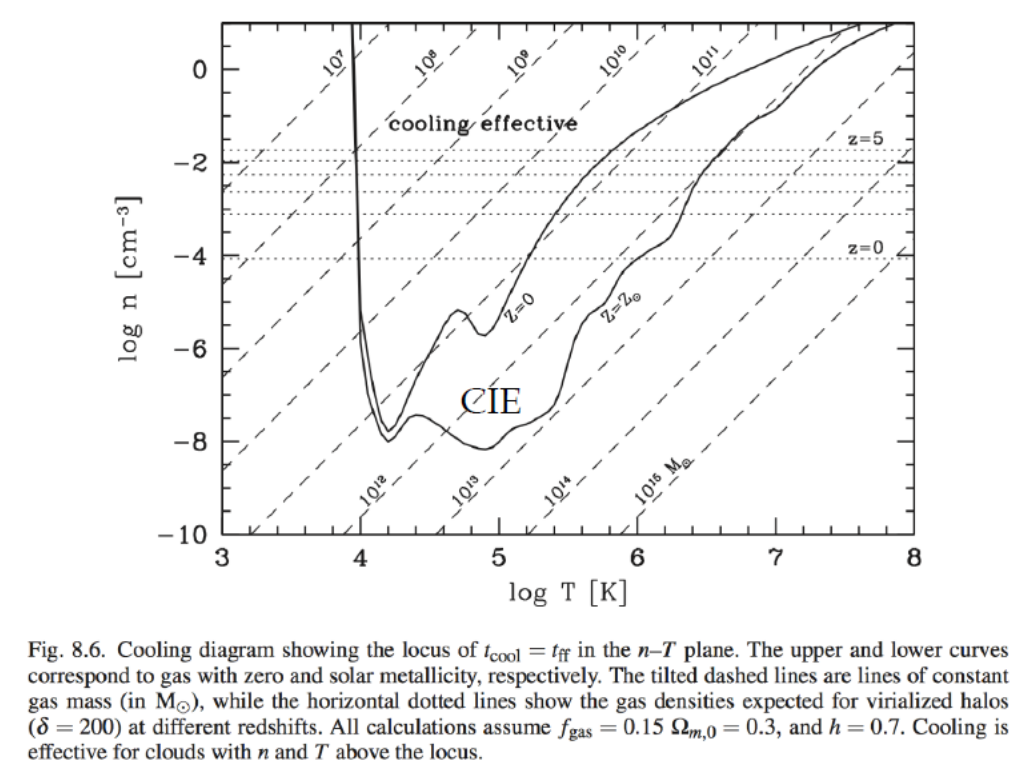